In [1]:
import pandas as pd

# Load the dataset
file_path = 'mushroom.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Summary of the dataset
summary = df.describe(include='all')

In [4]:
#data type and non null counts
info= df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
# Visualizing feature distributions
# Selecting some numerical features for visualizations
numerical_features = ['stalk_height', 'cap_diameter']

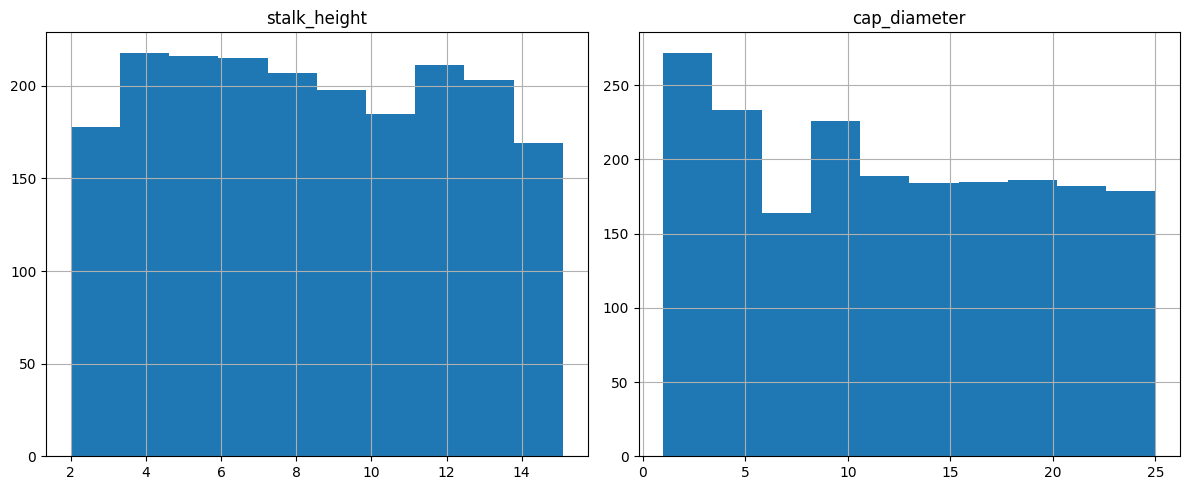

In [6]:
# Histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df[numerical_features].hist(ax=axes)
plt.tight_layout()

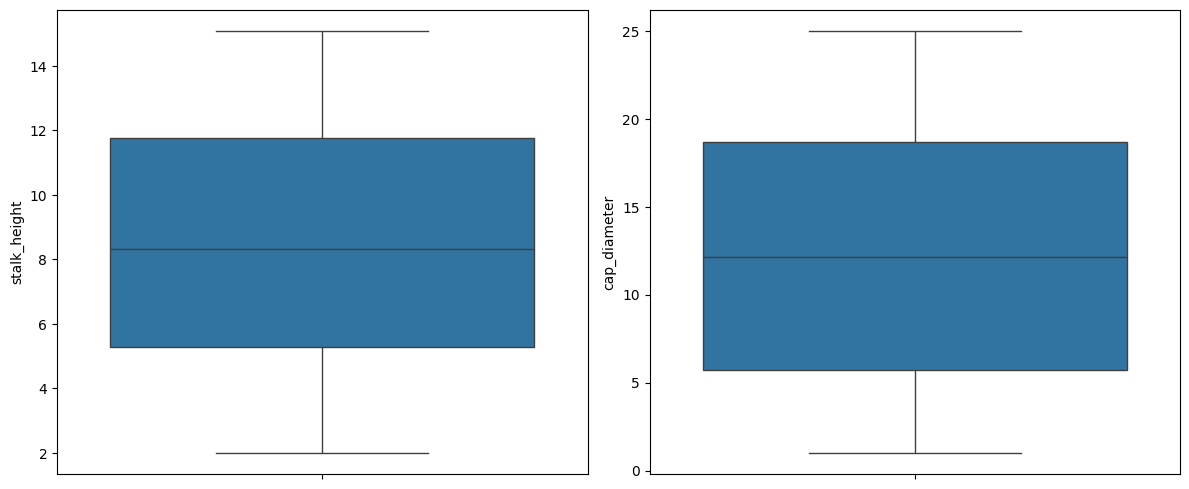

In [7]:
# Box plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
plt.tight_layout()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [9]:
# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

In [11]:
# Combine the numerical features with the encoded features
numerical_features = df[['stalk_height', 'cap_diameter']]
processed_df = pd.concat([numerical_features, encoded_df], axis=1)


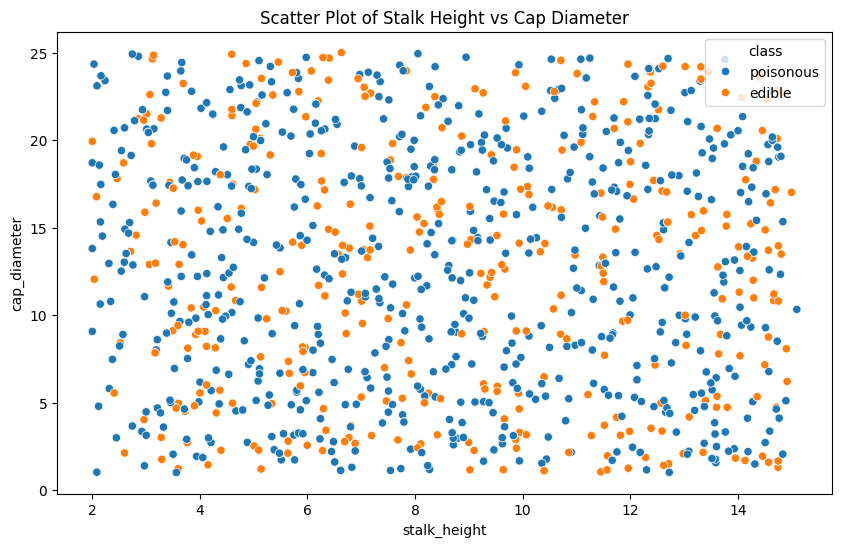

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for numerical features colored by class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class')
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.show()

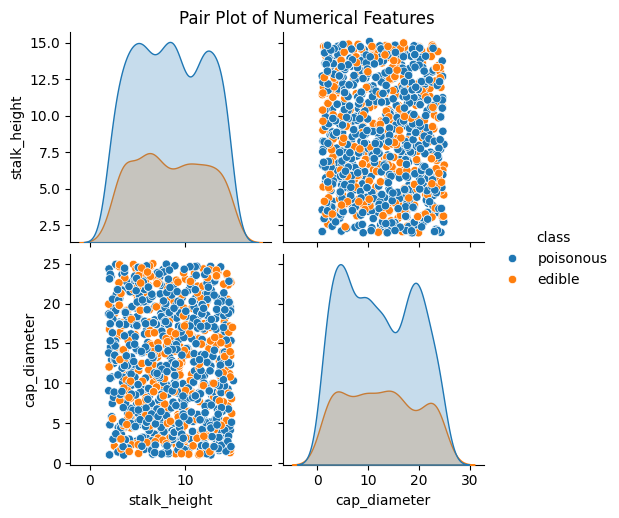

In [13]:
# Pair plot for numerical features
sns.pairplot(df, vars=['stalk_height', 'cap_diameter'], hue='class')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

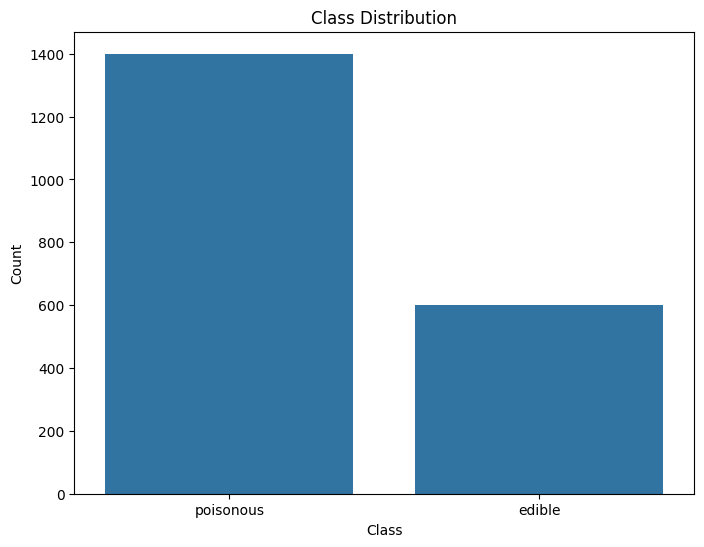

In [14]:
# Count plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [15]:
# Split the dataset into training and testing sets
X = processed_df
y = df['class'].apply(lambda x: 1 if x == 'poisonous' else 0)  # Encoding 'class' column: poisonous=1, edible=0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 105), (400, 105), (1600,), (400,))

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

In [18]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


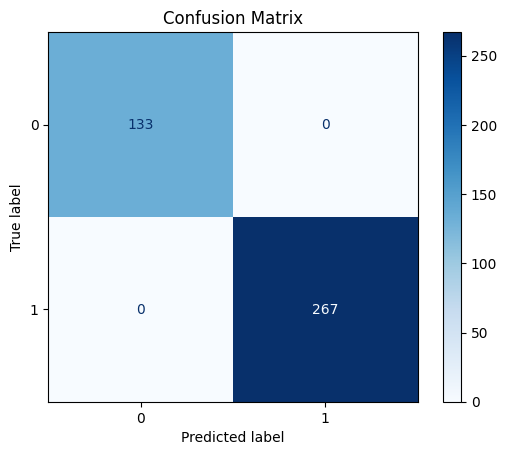

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [22]:
# Initialize the SVM classifier
svm_model = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [25]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

({'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, 1.0)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of kernels to compare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_C = best_params['C']

# Dictionary to store performance metrics for each kernel
performance_metrics = {}

# Train and evaluate SVM with different kernels
for kernel in kernels:
    # Initialize the SVM model with the best C value and current kernel
    svm_model = SVC(C=best_C, kernel=kernel, gamma='scale')

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    performance_metrics[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

performance_metrics

{'linear': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0},
 'poly': {'accuracy': 0.685,
  'precision': 0.6793893129770993,
  'recall': 1.0,
  'f1_score': 0.8090909090909091},
 'rbf': {'accuracy': 0.6675,
  'precision': 0.6675,
  'recall': 1.0,
  'f1_score': 0.800599700149925},
 'sigmoid': {'accuracy': 0.6575,
  'precision': 0.6710526315789473,
  'recall': 0.9550561797752809,
  'f1_score': 0.7882534775888718}}

 **Analyzing SVM Strengths and Weaknesses**

**Strengths:**

*Effective in high-dimensional spaces:* SVMs perform well even when the number of features is large.

*Memory efficiency:* Uses only a subset of the data points (support vectors) in the decision function.

*Versatility:* Can handle both linear and non-linear data with appropriate kernel choice.

**Weaknesses:**

*Choice of kernel:* The performance heavily depends on the kernel chosen.

Computational cost: *italicized text* Training can be slow, especially for large datasets.

*Parameter tuning:* Requires careful tuning of hyperparameters and kernel selection.

**Practical Implications of SVM in Real-World Classification Tasks**

**Robustness to Overfitting:** Particularly beneficial in high-dimensional spaces.

**Kernel Flexibility:** Allows for handling complex relationships within data.

**Scalability Issues:** High computational costs may limit the use of SVM in extremely large datasets.

**Parameter Sensitivity:** Effective but requires careful selection of parameters.